# Computing the Lithostatic Pressure

<i>This is about the last paragraph of chapter 7, after introducing how to make numerical integration</i><br/>

We define the lithostatic pressure as the vertical pressure at a specific depth due to the weight of the overlying rocks. The pressure applied by a resting rock mass (assuming adiabatic compression, hydrostatic equilibrium, and spherical symmetry) under the acceleration of gravity (Poirier, 2000) is related to the rock density by 

$\begin{equation}
p(z) = p_{0} + \int_{z_1=0}^{z}\rho(z_1)g(z_1)dz_1,
\label{eq:lithopress}
\end{equation}$

where $p(z)$ is the pressure at depth $z$, $p_0$ is the pressure at the surface, $\rho(z_1)$ is the bulk density for the rock mass as a function of depth, and $g(z_1)$ is the acceleration due to gravity.

As a zeroth-order approximation, we assume $p_0=0$ and that both $\rho(z)$ and $g(z)$ are constant, which reduces the above equation to

$\begin{equation}
p(z) = \rho g z.
\label{eq:simple_lithopress}
\end{equation}$

The following code listing shows its implementation in Python.

In [2]:
def simple_lithopress(z,ro=2900, g=9.8):
    pressure = z*g*ro/1e6 # return the pressure in MPa
    return pressure

my_pressure = simple_lithopress(z=2000)
print('The pressure at 2000 meters is {0:.0f} MPa'.format(my_pressure))

The pressure at 2000 meters is 57 MPa



| Layer      | $r$ from <br> $km$ | $r$ to <br> $km$ | Thickness <br>$km$ | Bottom density <br>$kg/m^3$   | Top density <br>$kg/m^3$   |
|:----------:|:-------------:|:-----------:|:--------------:|:-------------------------:|:----------------------:|
|Inner core  | 1             | 1220        | 1220           | 13100                     | 12800                  |
|Outer core  | 1221          | 3479        | 2259           | 12200                     | 9900                   |
|Lower mantle| 3480          | 5650        | 2171           | 5600                      | 4400                   |
|Upper mantle| 5651          | 6370        | 720            | 4130                      | 3400                   | 
|Crust       | 6371          | 6400        | 30             | 3100                      | 2700                   |
|            |               |             |                |                           |                        |

We now take on the full implementation of the equation describing the lithostatic pressure. Using the data from Dziewonski and Anderson (1981) and Anderson (1989) and assuming that $\rho$ varies linearly between the upper and lower limits of each shell (i.e., crust, upper mantle, lower mantle, outer core, and inner core), we create an array that constitutes a first-order approximation of $\rho(z)$ (see the above Table). To simplify the presentation of the data, we define a new variable  $r$ (the radial distance from the Earth's center) as $r = R - z$, where $R\approx 6400~km$ is the Earth's radius and the Earth is approximated as a sphere.



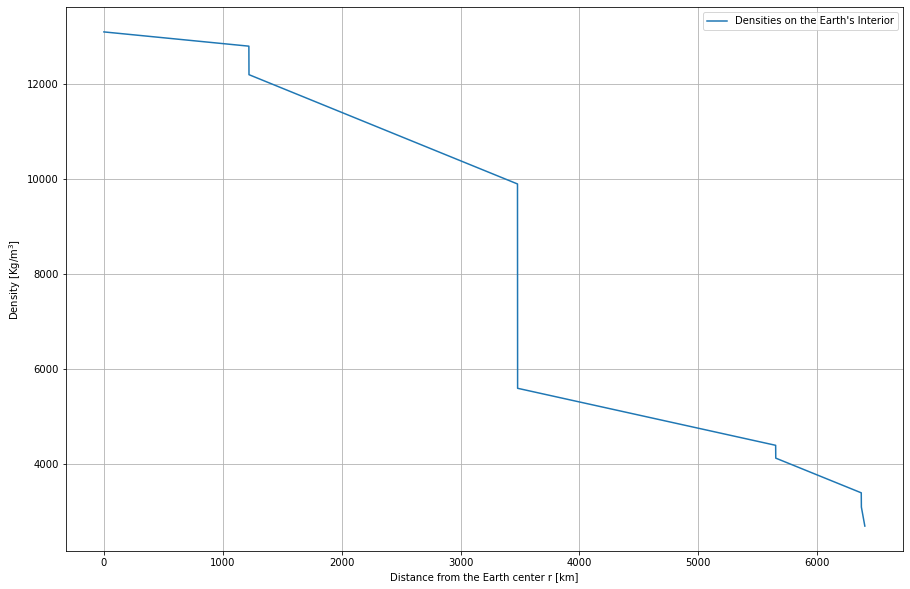

In [4]:
import numpy as np
from scipy.integrate import trapz
import matplotlib.pyplot as plt

r = np.linspace(1,6400,6400)

def density():
    ro_inner_core = np.linspace(13100, 12800, 1220)
    ro_outer_core = np.linspace(12200, 9900, 2259)
    ro_lower_mantle = np.linspace(5600,4400,2171)
    ro_upper_mantle = np.linspace(4130,3400,720)
    ro_crust = np.linspace(3100,2700,30)
   
    ro_final = np.concatenate((ro_inner_core, ro_outer_core, ro_lower_mantle, ro_upper_mantle, ro_crust))
    
    return ro_final

ro = density()

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(r,ro, label="Densities on the Earth's Interior")
ax.set_ylabel(r"Density [Kg/m$^3$]")
ax.set_xlabel("Distance from the Earth center r [km]")
ax.legend()
ax.grid()

The acceleration $g(r)$ at a distance $r$ from Earth's center (Poirier,2000) is estimated  by using

$\begin{equation}
g(r) = \frac {4 \pi G}{r^2} \int_{r_1=0}^{r}\rho (r_1) r_1^2dr_1,
\end{equation}$

where $G=(6.67408 \pm 0.0031) \times 10^{-11}\ \text{m}^3\,\text{kg}^{-1}\, \text{s}^{-2}$ is the ''universal gravitational constant.''

Text(0.5, 0, 'Distance from the Earth center r [km]')

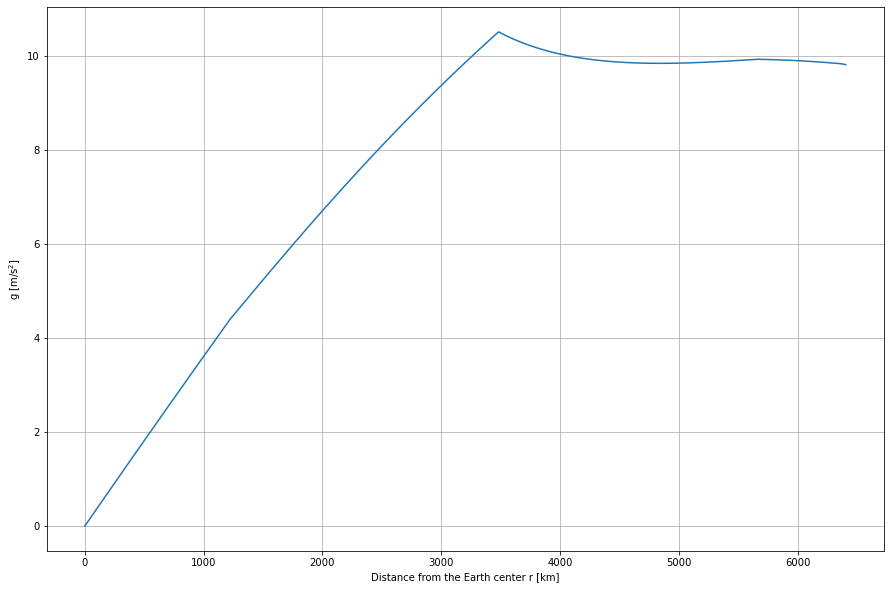

In [6]:
def gravity(r):
    
    g = np.zeros(len(r))
    Gr = 6.67408e-11
    r = r * 1000 # from Km to m
    
    for i in range(1,len(r)):
        
        r1 = r[0:i]
        ro1  = ro[0:i]
        r2 = r1[i-1]
    
        y = ro1*r1**2
        y_int = trapz(y,r1)
        
        g1 = ((4 * np.pi*Gr)/(r2**2)) * y_int
        g[i] = g1
           
    return g

g = gravity(r)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(r,g)
ax.grid()
ax.set_ylabel(r'g [m/s$^2]$')
ax.set_xlabel('Distance from the Earth center r [km]')

Text(0.5, 0, 'Depth z from the Earth Surface [km]')

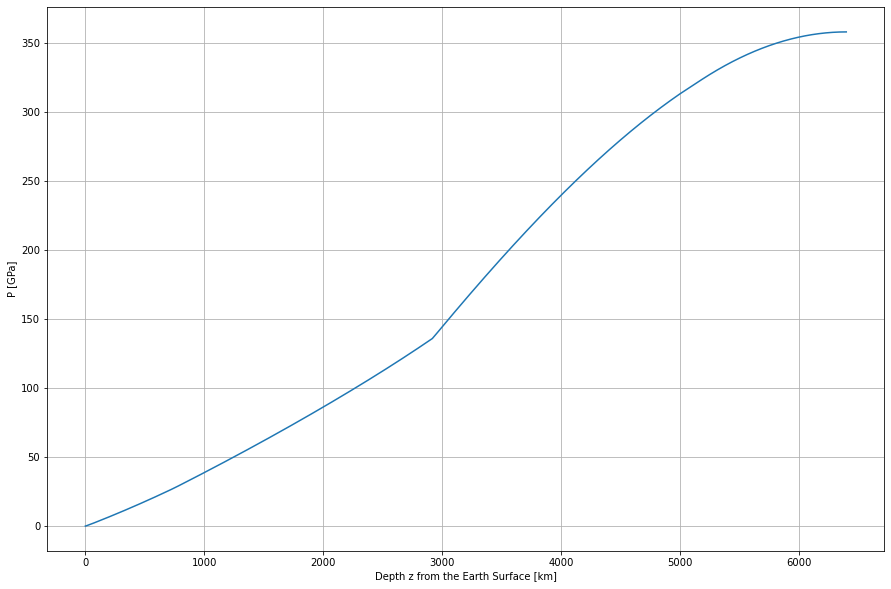

In [8]:
def pressure(r, ro, g):
    
    p = np.zeros(len(r))
    r = r *1000
    
    for i in range(0,len(r)):    
        r1 = r[i:len(r)]
        ro1 = ro[i:len(r)]
        g1 = g[i:len(r)]
        y = ro1*g1
        p1 = trapz(y,r1)
        p[i] = p1
    return p
    
p = pressure(r,ro,g)/1e9 # expressed in GPa
z = np.linspace(6400, 1, 6400)

fig, ax = plt.subplots(figsize=(15,10))  
ax.plot(z,p)
ax.grid()
ax.set_ylabel('P [GPa]')
ax.set_xlabel('Depth z from the Earth Surface [km]')

### References:

<ul>
    <li>Anderson, D. L. (1989).Theory of the Earth. Blackwell Scientific Publications.</li>
    <li>Dziewonski, A. M., & Anderson, D. L. (1981). Preliminary reference Earth model.Physics of the Earth and Planetary Interiors,25(4), 297–356. https://doi.org/10.1016/0031-9201(81)90046-7</li>
    <li>Poirier, J. (2000).Introduction to the physics of the earth’s interior(2ed.). CambridgeUniversity Press.</li>